
# Project 03
- Mae Vega 
- Ibrahim Kiceci 
- Furkan Bozokluoglu 


# Garment Employees’ Productivity Prediction





# 1. Introduction


### Over View of the Project
Productivity Prediction of Garment Employees," contributed on August 2nd, 2020, by the UCI Machine Learning Repository, stands as a pivotal resource for gaining insights into employee productivity within the garment industry.
The primary challenge resides in predicting and enhancing the productivity levels of employees. The project focus is on developing a predictive model tailored to anticipate and optimize employee productivity.


## Productivity Prediction:
### Task: Regression
Goal: Predict the actual productivity based on various features. Evaluate the model's performance using metrics like Mean Squared Error (MSE) or R-squared.


### Data - Features Information

    1.	date			:	Date in MM-DD-YYYY
    2.	day			:	Day of the Week
    3.	quarter			:	A portion of the month. A month was divided into four quarters
    4.	department		:	Associated department with the instance
    5.	team_no			:	Associated team number with the instance
    6.	no_of_workers		:	Number of workers in each team
    7.	no_of_style_change	:	Number of changes in the style of a particular product
    8.	targeted_productivity	:	Targeted productivity set by the Authority for each team for each day.
    9.	smv			:	Standard Minute Value, it is the allocated time for a task
    10.	wip			:	Work in progress. Includes the number of unfinished items for products
    11.	over_time		:	Represents the amount of overtime by each team in minutes
    12.	incentive		:	Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.
    13.	idle_time		:	The amount of time when the production was interrupted due to several reasons
    14.	idle_men		:	The number of workers who were idle due to production interruption
    15.	actual_productivity	:	The actual % of productivity that was delivered by the workers. It ranges from 0-1.





In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Data Wrangling and Transformation




## 2.1 Data Loading
        - Load the dataset into a Pandas DataFrame
        - Display basic information about the dataset (columns, data types, missing values)

In [2]:
# Please copy your cvs file to folder drive/MyDrive
# Now you can read your .cvs file which is stored in My Drive
## I saved the data inside of the file, it can be easier when save as ipynb
unclean_data = pd.read_csv('garments_worker_productivity.csv',sep = ",")

In [3]:
## copied the orginal dataset as df
unclean_df = unclean_data.copy()

In [4]:
unclean_df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [5]:
# Display basic information about the dataset
unclean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [6]:
# Display initial summary statistics about the dataset
unclean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
team,1197.0,6.426901,3.463963,1.000000,3.000000,6.000000,9.000000,12.000000
targeted_productivity,1197.0,0.729632,0.097891,0.070000,0.700000,0.750000,0.800000,0.800000
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.560000
wip,691.0,1190.465991,1837.455001,7.000000,774.500000,1039.000000,1252.500000,23122.000000
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.000000
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.000000
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.000000
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.000000
no_of_style_change,1197.0,0.150376,0.427848,0.000000,0.000000,0.000000,0.000000,2.000000
no_of_workers,1197.0,34.609858,22.197687,2.000000,9.000000,34.000000,57.000000,89.000000


  ## 2.2 Data Cleaning
        - Handle missing values (if any)
        - Check for duplicate records and remove them
        - Address any other data quality issues

In [7]:
# Check for missing values
missing_values = unclean_df.isnull().sum()
print("Missing Values\n", missing_values)

Missing Values
 date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64


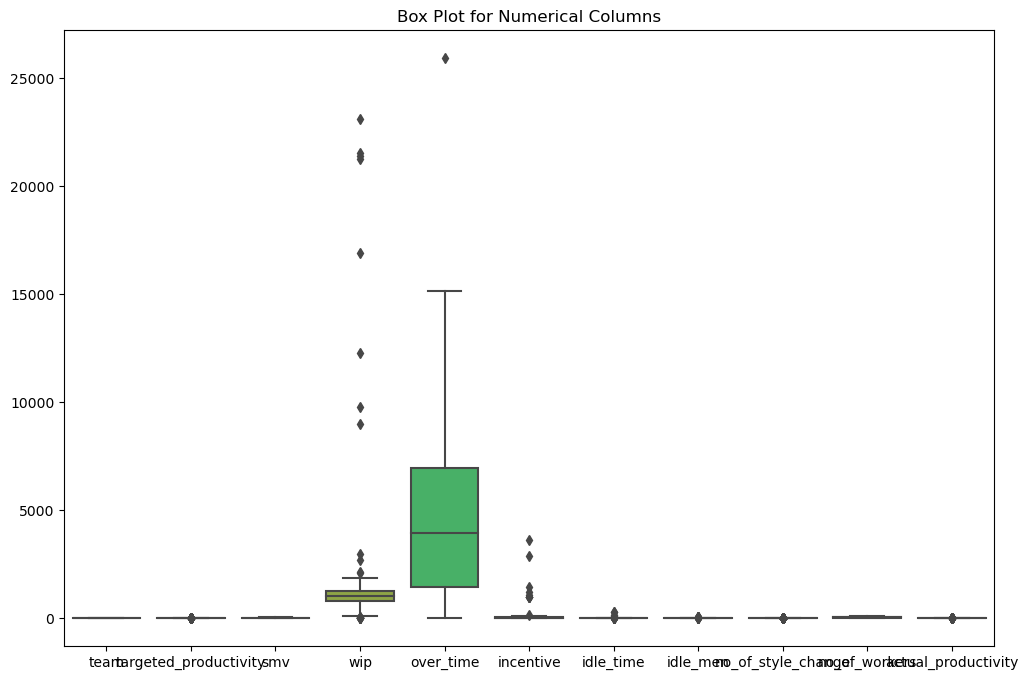

In [8]:
## to decide the fill wip nan values, we re checking the outliers.
plt.figure(figsize=(12, 8))
sns.boxplot(data=unclean_df)
plt.title('Box Plot for Numerical Columns')
plt.show()

There are some of outliers value as seen on the box graph, so we will fill the Nan values with median value of wip

In [9]:
## getting the median value of the wip feature
median_wip = unclean_df['wip'].median()
median_wip

1039.0

In [10]:
## filling the NaN values with median score
unclean_df['wip'].fillna(median_wip, inplace = True)

In [11]:
## checking of the nan values
unclean_df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [12]:
# Display data types of each column
data_types = unclean_df.dtypes
print("Data Types:\n", data_types)

Data Types:
 date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [13]:
#Drop date column
unclean_df.drop(columns = ['date'], inplace = True)

In [14]:
# Remove duplicate rows
unclean_df = unclean_df.drop_duplicates()

# Verify if duplicates are removed
print("Number of Duplicate Rows:", unclean_df.duplicated().sum())


Number of Duplicate Rows: 0


In [15]:
unclean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 131.1+ 

In [16]:
## checking duplicates on department
unclean_df.department.value_counts()

department
sweing        691
finishing     257
finishing     249
Name: count, dtype: int64

In [17]:
## there are two 'finishing' in department so we combine them
unclean_df['department'].replace({'finishing ': 'finishing'}, inplace=True)
unclean_df.department.value_counts()

department
sweing       691
finishing    506
Name: count, dtype: int64

In [18]:
## checking duplicates on quarter
unclean_df.quarter.value_counts()

quarter
Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: count, dtype: int64

In [19]:
## checking duplicates on day
unclean_df.day.value_counts()

day
Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: count, dtype: int64

## 2.3 Data Transformation
        - Convert categorical variables (if any) into numerical format
        - Standardize or normalize numerical features as needed

In [20]:
## checking of the catregorical features
unclean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   object 
 1   department             1197 non-null   object 
 2   day                    1197 non-null   object 
 3   team                   1197 non-null   int64  
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   int64  
 8   incentive              1197 non-null   int64  
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   int64  
 11  no_of_style_change     1197 non-null   int64  
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(6), int64(5), object(3)
memory usage: 131.1+ 

In [21]:
## getting categorical features
categorical_columns = unclean_df.select_dtypes('object').columns
categorical_columns

Index(['quarter', 'department', 'day'], dtype='object')

In [22]:
#Convert categorical features to numerical

weekday_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}

# Map the 'day' column using the defined mapping
unclean_df['day'] = unclean_df['day'].map(weekday_mapping)

quarter_mapping = {'Quarter1': 1, 'Quarter2': 2, 'Quarter3': 3, 'Quarter4': 4, 'Quarter5': 5}
unclean_df['quarter'] = unclean_df['quarter'].map(quarter_mapping)

department_mapping = {'sweing': 1, 'finishing': 2}
unclean_df['department'] = unclean_df['department'].map(department_mapping)

In [23]:
# Convert categorical variables into numerical format
# unclean_df = pd.get_dummies(unclean_df, columns=['quarter', 'department', 'day'])

In [24]:
unclean_df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,1,4,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1,2,4,1,0.75,3.94,1039.0,960,0,0.0,0,0,8.0,0.886500
2,1,1,4,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1,1,4,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1,1,4,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Min-Max scaling is choosen because, we want to keep original relationships between data points and data has outliers,

In [25]:
# Standardize or normalize numerical features
from sklearn.preprocessing import MinMaxScaler
# Identify numeric columns
numeric_columns = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
                   'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']
# Separate the numeric features
numeric_data = unclean_df[numeric_columns]

# Standardize numeric features
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(numeric_data), columns=numeric_columns)

# Replace original numeric features with standardized ones
unclean_df[numeric_columns] = scaled_data

# Display the modified DataFrame
unclean_df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,1,4,0.636364,1.000000,0.450252,0.047631,0.273148,0.027222,0.0,0.0,0.0,0.655172,0.940725
1,1,2,4,0.000000,0.931507,0.020132,0.044646,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.886500
2,1,1,4,0.909091,1.000000,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.800570
3,1,1,4,1.000000,1.000000,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.800570
4,1,1,4,0.454545,1.000000,0.445219,0.050314,0.074074,0.013889,0.0,0.0,0.0,0.620690,0.800382


In [26]:
## Doing two decimal values to the actual productivity
unclean_df['actual_productivity'] = unclean_df['actual_productivity'].round(2)

In [27]:
# # Save cleaned dataset to a new CSV file
# cleaned_file_path = '/content/drive/My Drive/garments_worker_productivity_cleaned.csv'
##df.to_csv(cleaned_file_path, index=False)
unclean_df.to_csv('garments_worker_productivity_cleaned.csv',index = False)


In [28]:
### Saving clean data as df

df = unclean_df.copy()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   quarter                1197 non-null   int64  
 1   department             1197 non-null   int64  
 2   day                    1197 non-null   int64  
 3   team                   1197 non-null   float64
 4   targeted_productivity  1197 non-null   float64
 5   smv                    1197 non-null   float64
 6   wip                    1197 non-null   float64
 7   over_time              1197 non-null   float64
 8   incentive              1197 non-null   float64
 9   idle_time              1197 non-null   float64
 10  idle_men               1197 non-null   float64
 11  no_of_style_change     1197 non-null   float64
 12  no_of_workers          1197 non-null   float64
 13  actual_productivity    1197 non-null   float64
dtypes: float64(11), int64(3)
memory usage: 131.1 KB


# 3. Exploratory Data Analysis (EDA)
   

   

   


In [30]:
# Looking of the descriptive statistics in our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quarter,1197.0,2.399332,1.215535,1.00,1.000000,2.000000,3.000000,5.00
department,1197.0,1.422723,0.494199,1.00,1.000000,1.000000,2.000000,2.00
day,1197.0,3.812865,2.112252,1.00,2.000000,3.000000,6.000000,7.00
team,1197.0,0.493355,0.314906,0.00,0.181818,0.454545,0.727273,1.00
targeted_productivity,1197.0,0.903606,0.134097,0.00,0.863014,0.931507,1.000000,1.00
smv,1197.0,0.235427,0.211832,0.00,0.020132,0.239257,0.413473,1.00
wip,1197.0,0.048429,0.060465,0.00,0.041661,0.044646,0.046550,1.00
over_time,1197.0,0.176214,0.129198,0.00,0.055556,0.152778,0.268519,1.00
incentive,1197.0,0.010614,0.044495,0.00,0.000000,0.000000,0.013889,1.00
idle_time,1197.0,0.002434,0.042366,0.00,0.000000,0.000000,0.000000,1.00


In [31]:
# Explore the central tendency and spread of the target variable
print(df['actual_productivity'].describe())

count    1197.000000
mean        0.734996
std         0.174398
min         0.230000
25%         0.650000
50%         0.770000
75%         0.850000
max         1.120000
Name: actual_productivity, dtype: float64


### 3.2 Univariate Analysis
        - Visualize distributions of individual features
        - Identify outliers in the data

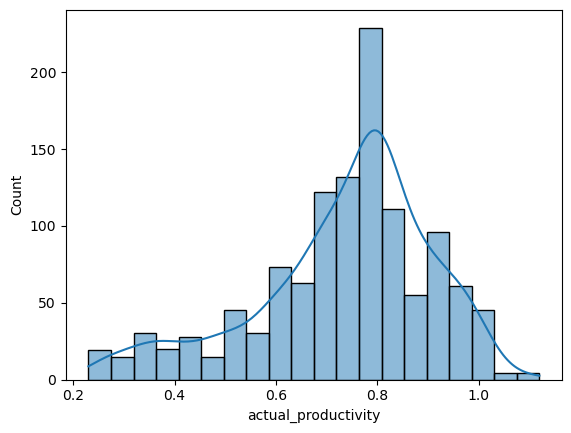

In [32]:
# Visualize distributions of actual_productivity
sns.histplot(df['actual_productivity'], bins=20, kde=True)
plt.show()

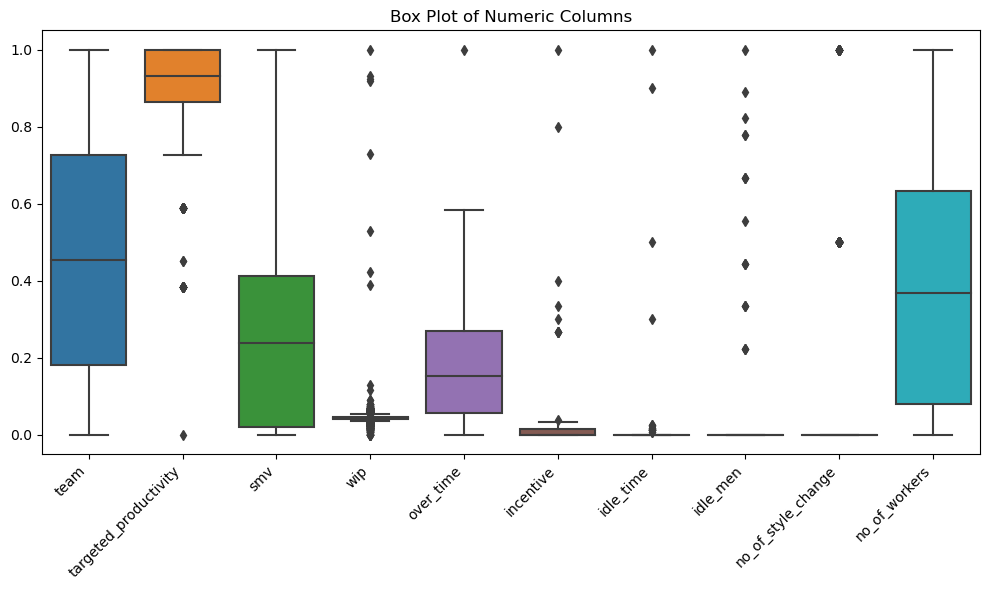

In [33]:
## Identify outliers in the data
plt.figure(figsize=(10, 6))
columns_to_plot = ['team', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
                   'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']

ax = sns.boxplot(data=df[columns_to_plot])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.title('Box Plot of Numeric Columns')
plt.tight_layout()
plt.show()

### 3.3 Bivariate Analysis
        - Explore relationships between features and the target variable
        - Use scatter plots, correlation matrices, etc.

In [34]:
## Looking of the correlation
corr = df.corr()
corr

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
quarter,1.000000,0.012441,0.061695,0.021038,-0.112319,-0.000105,-0.065259,0.026654,-0.028237,-0.060779,-0.023884,0.189905,-0.005594,-0.052253
department,0.012441,1.000000,0.014169,-0.031753,0.067508,-0.874230,-0.053557,-0.677519,-0.045782,-0.049181,-0.096701,-0.300889,-0.939360,0.088786
day,0.061695,0.014169,1.000000,-0.011927,0.029671,-0.007079,-0.104972,0.038046,-0.105458,0.032969,0.025031,-0.026198,-0.016574,0.000316
team,0.021038,-0.031753,-0.011927,1.000000,0.030274,-0.110011,-0.023647,-0.096737,-0.007674,0.003796,0.026974,-0.011194,-0.075113,-0.148499
targeted_productivity,-0.112319,0.067508,0.029671,0.030274,1.000000,-0.069489,0.045428,-0.088557,0.032768,-0.056181,-0.053818,-0.209294,-0.084288,0.421639
smv,-0.000105,-0.874230,-0.007079,-0.110011,-0.069489,1.000000,0.028526,0.674887,0.032629,0.056863,0.105901,0.315388,0.912176,-0.123090
wip,-0.065259,-0.053557,-0.104972,-0.023647,0.045428,0.028526,1.000000,0.050755,0.024301,-0.023596,-0.043241,-0.052790,0.060086,0.083558
over_time,0.026654,-0.677519,0.038046,-0.096737,-0.088557,0.674887,0.050755,1.000000,-0.004793,0.031038,-0.017913,0.059790,0.734164,-0.054779
incentive,-0.028237,-0.045782,-0.105458,-0.007674,0.032768,0.032629,0.024301,-0.004793,1.000000,-0.012024,-0.021140,-0.026607,0.049222,0.075903
idle_time,-0.060779,-0.049181,0.032969,0.003796,-0.056181,0.056863,-0.023596,0.031038,-0.012024,1.000000,0.559146,-0.011598,0.058049,-0.080660


/Users/furkan/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/var/folders/g_/m2n7wcm10q180nwvb9ftcmb00000gn/T/ipykernel_24411/3696414312.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


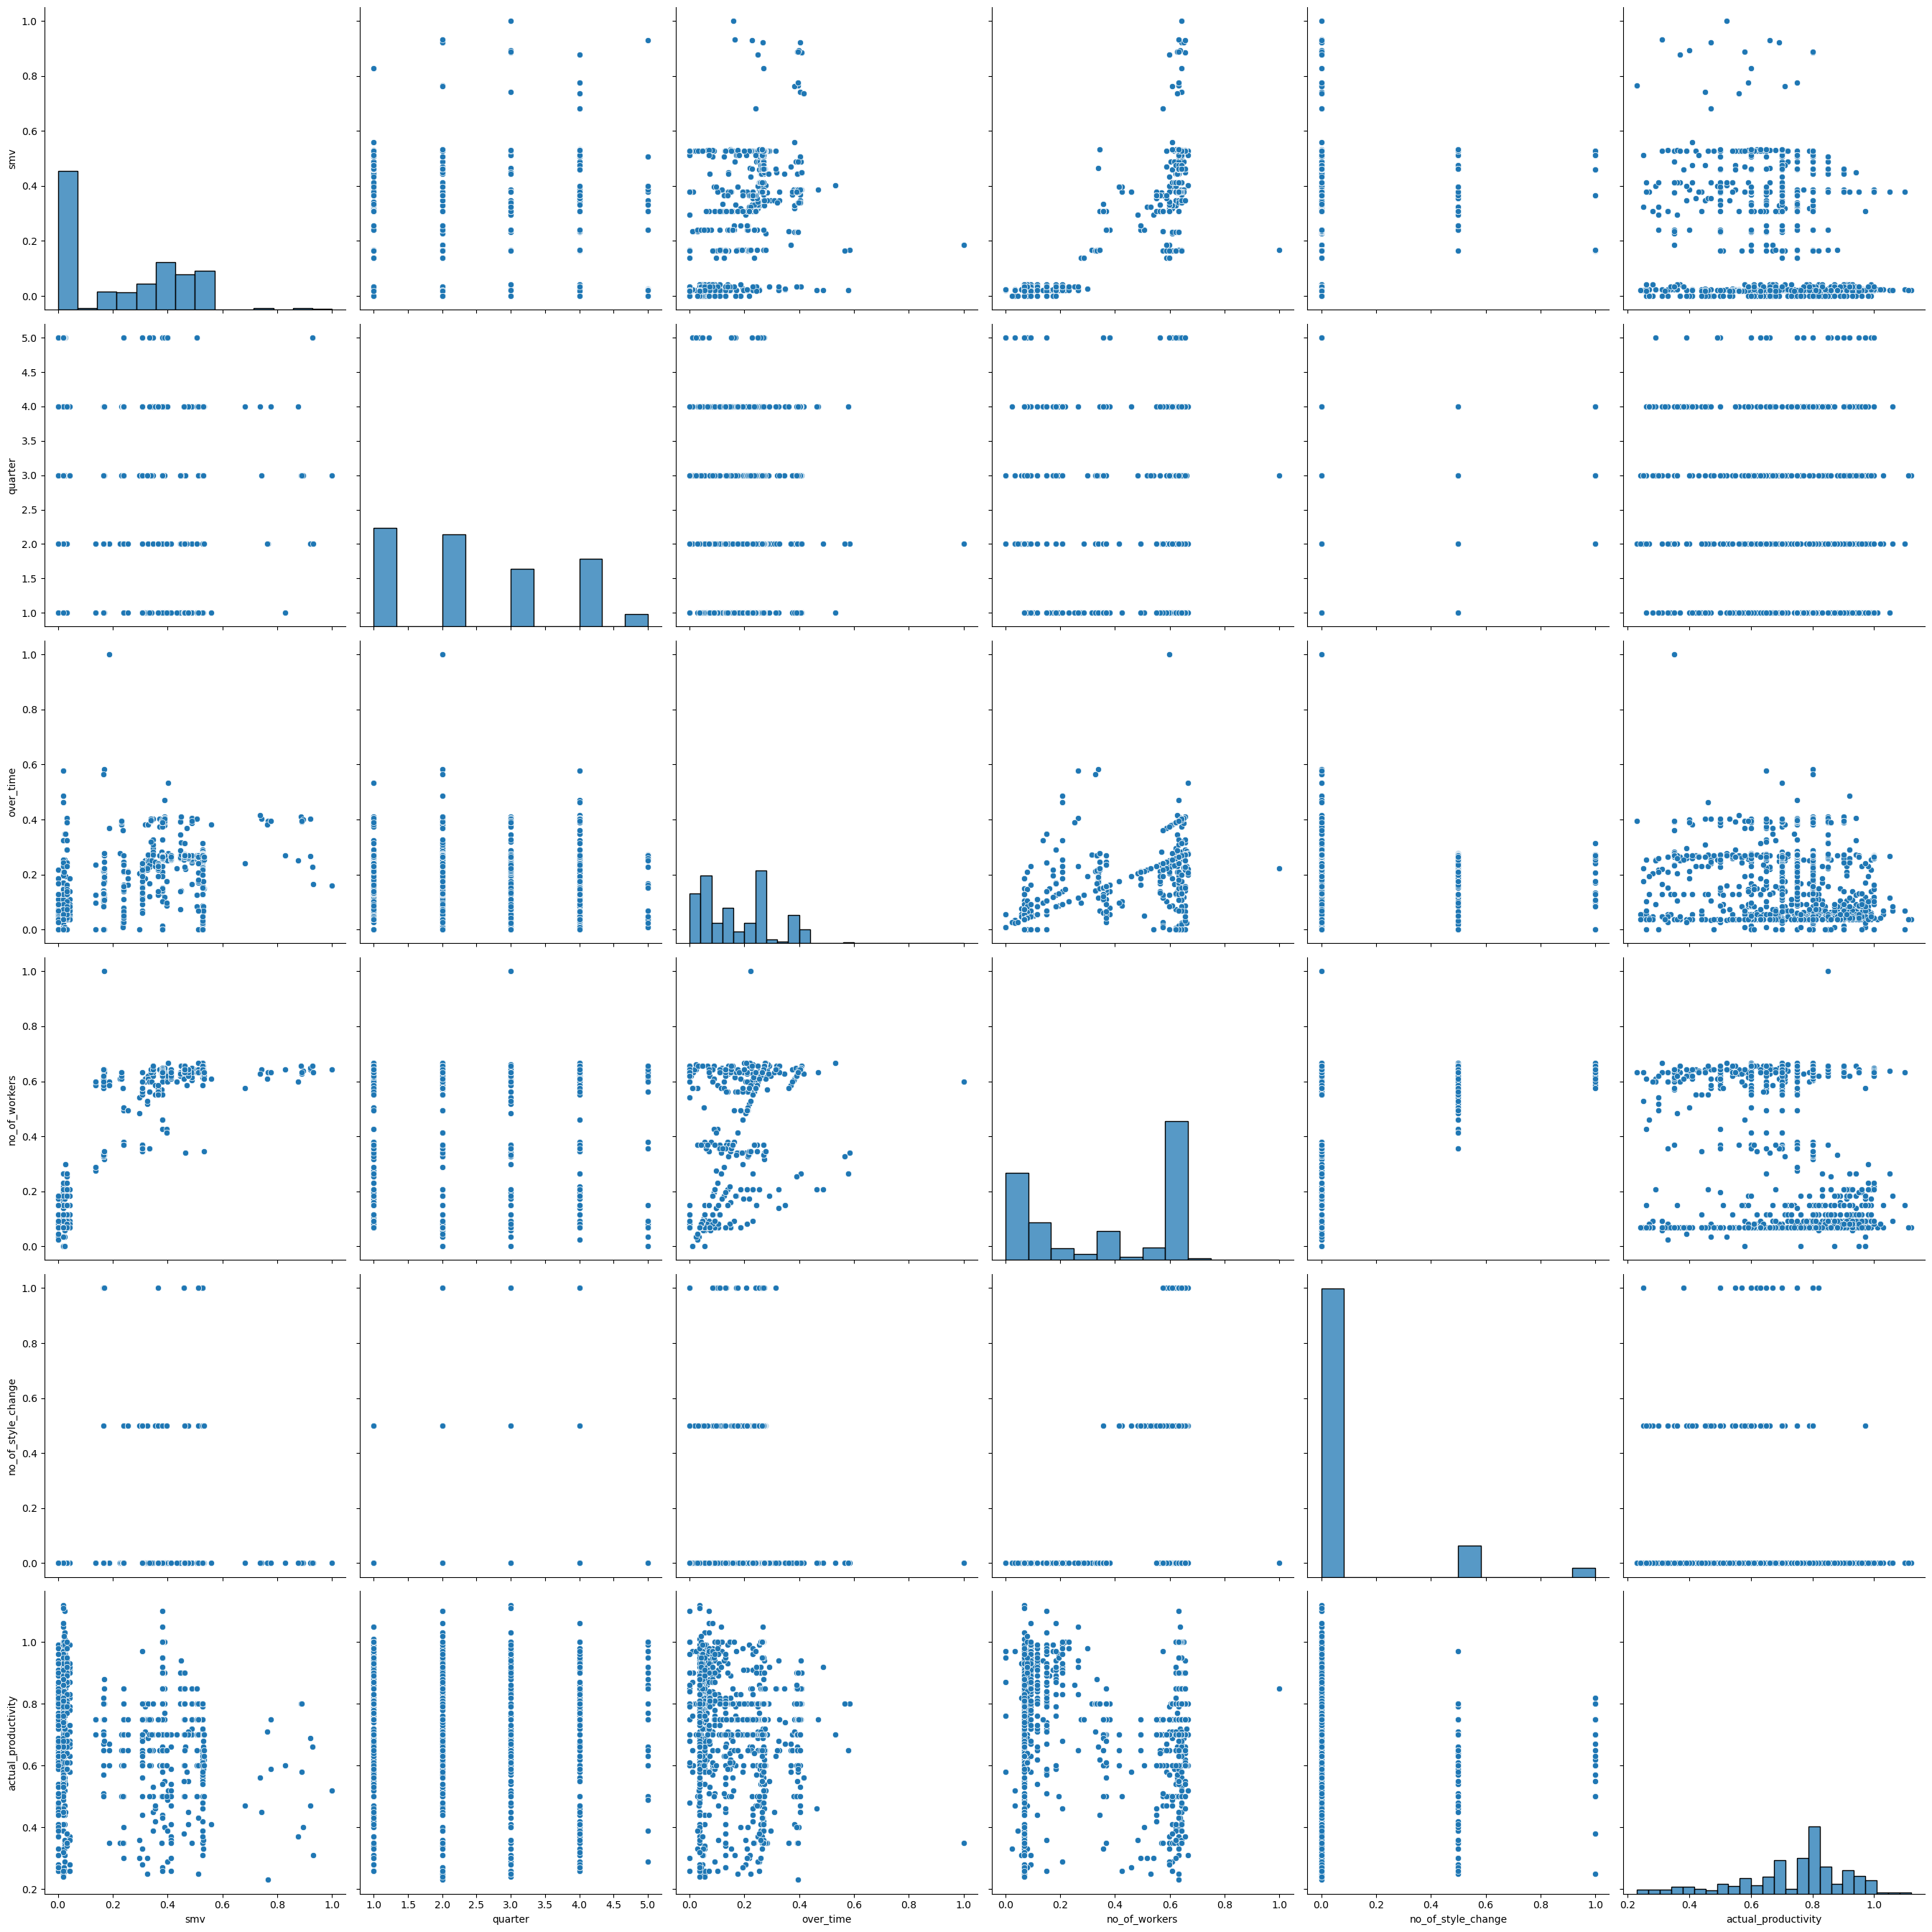

In [35]:
## Looking at the Correlation Between Features
%matplotlib inline
columns_pairplot = ['smv', 'quarter','over_time' ,'no_of_workers', 'no_of_style_change','actual_productivity']
sns.pairplot(df[columns_pairplot], height = 4.5)
plt.tight_layout()

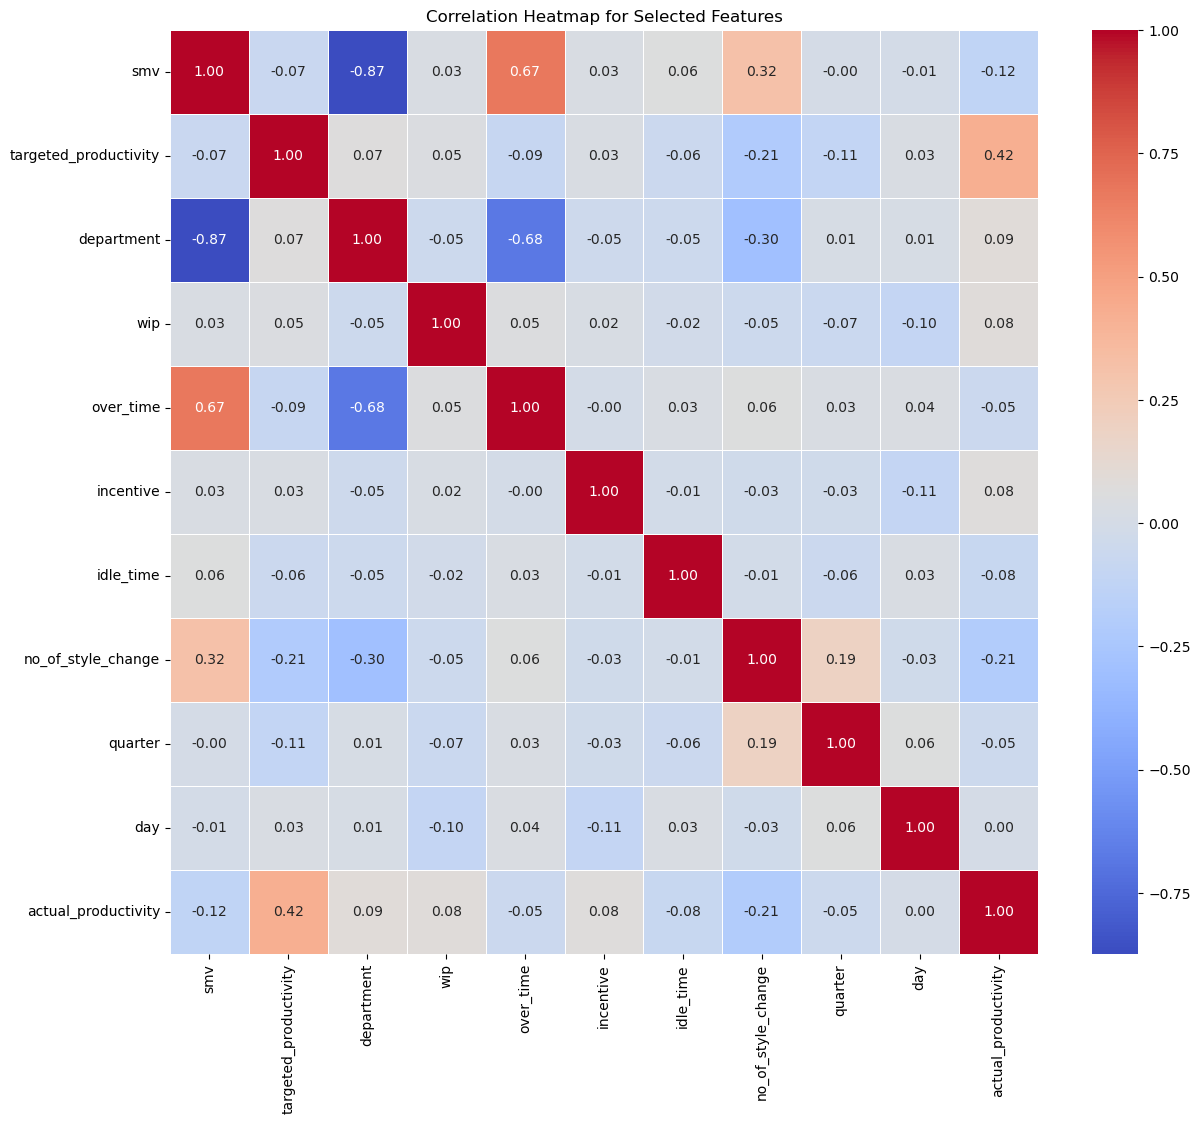

In [36]:
#selected features for heat map
selected_features = [
    'smv',
    'targeted_productivity',
    'department',
    'wip',
    'over_time',
    'incentive',
    'idle_time',
    'no_of_style_change',
    'quarter',
    'day'
]


selected_features.append('actual_productivity') 

# Extract the selected features
selected_data = df[selected_features]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap for Selected Features')

# Show the plot
plt.show()

Correlation matrix shows that actual productivity has not any relations with day and the most highest relation is 0.42 with targeted productivity


   ### 3.4 Interesting Plots/Charts
        - Creating plots or charts that highlight interesting patterns or insights
        - Providing observations based on these visualizations

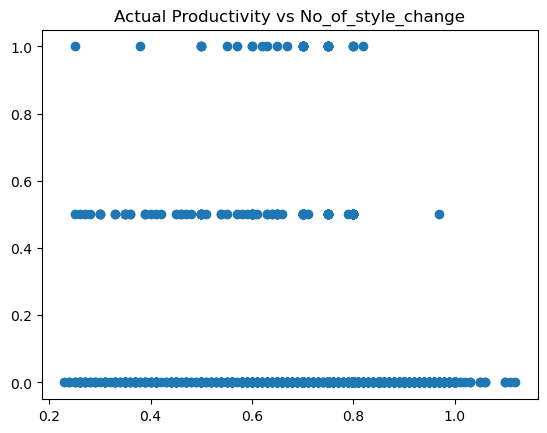

In [37]:
## relationship between actual productivity and no_of_style_change
plt.scatter(df.actual_productivity, df.no_of_style_change);
plt.title("Actual Productivity vs No_of_style_change");

Lower number of style changes tends to be associated with higher productivity. This observation may be explained by the change of the style of a product. Workers may require time to adapt to new style requirements, leading to a temporary decrease in productivity.

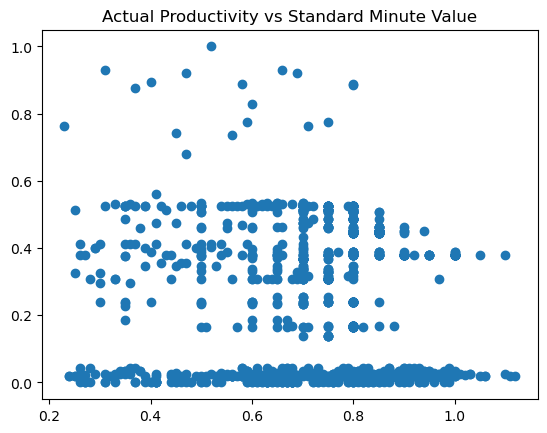

In [38]:
## relationship between actual productivity and Standard Minute Value
plt.scatter(df.actual_productivity, df.smv);
plt.title("Actual Productivity vs Standard Minute Value");

As the Standard Minute Value (SMV) decreases or is lower, there is a tendency for productivity to increase. Conversely, higher SMV values are associated with lower productivity. This relationship may suggest that tasks with lower allocated times are associated with higher productivity. If workers can complete tasks within or below the allocated time, it may contribute to higher overall productivity.

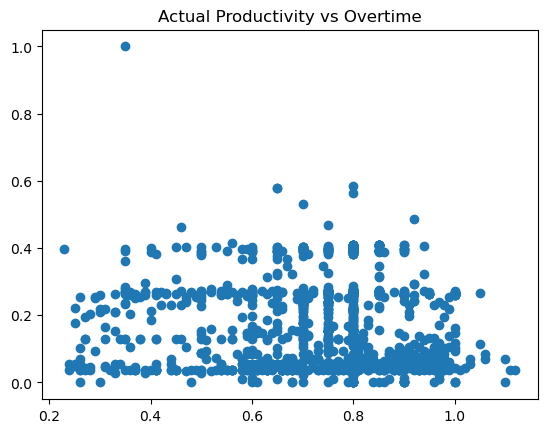

In [39]:
## relationship between actual productivity and over time
plt.scatter(df.actual_productivity, df.over_time);
plt.title("Actual Productivity vs Overtime");

According to the chart above, the majority of workers who have less overtime exhibit higher productivity rates. We assume that reduced overtime results in lower fatigue levels, contributing to increased productivity.

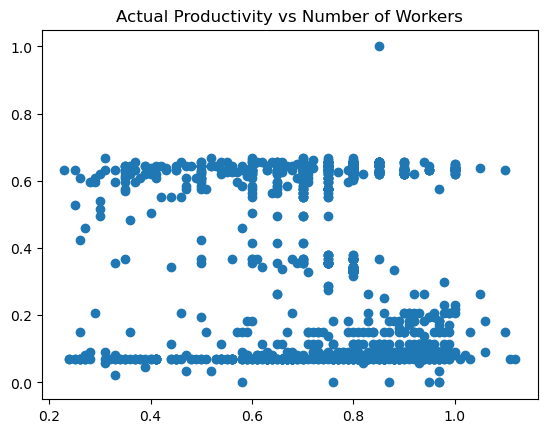

In [40]:
## relationship between actual productivity and number of workers
plt.scatter(df.actual_productivity, df.no_of_workers);
plt.title("Actual Productivity vs Number of Workers");

According to the chart above, workers tend to be more productive when there are fewer workers. Conversely, when there are more workers, the productivity level decreases slightly. We assume that workers are more relaxed in larger groups.

## 3.5 Feature Importance Analysis
In this section, we explore the importance of various features in predicting the target variable using a linear regression model. The linear regression model was trained on the training set, and the feature importance was extracted using the coefficients of the model. The feature importance values were then visualized using a horizontal bar plot.

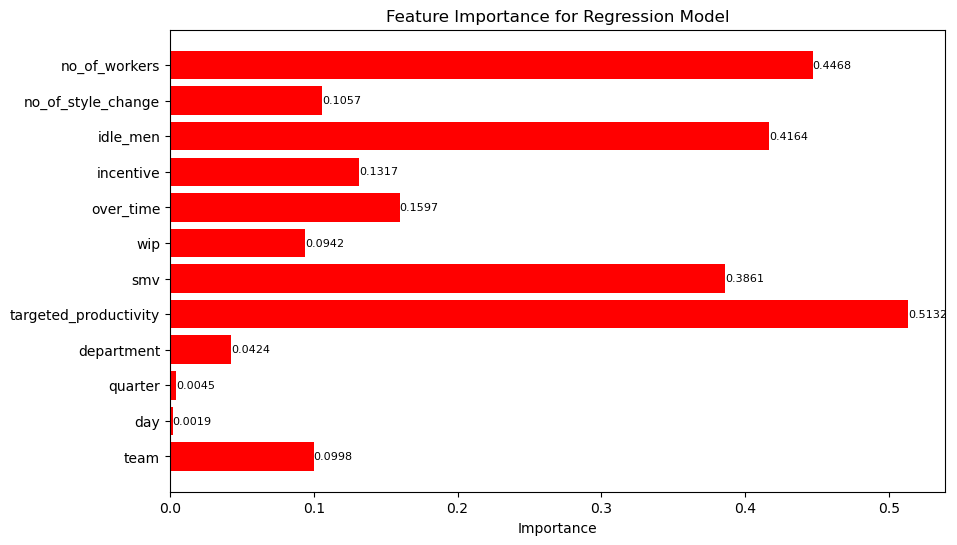

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Selecting the features and the target variable
features = ['team', 'day', 'quarter', 'department', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_men', 'no_of_style_change', 'no_of_workers']
target = 'actual_productivity'

# Creating a subset of the data with the selected features
data_subset = df[features + [target]]

# Splitting the data into training and testing sets
train_data, test_data = train_test_split(data_subset, test_size=0.2, random_state=42)

train_X = train_data[features]
train_y = train_data[target]
test_X = test_data[features]
test_y = test_data[target]

# Fit a linear regression model
model = LinearRegression()
model.fit(train_X, train_y)

feature_importance = np.abs(model.coef_)

fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.barh(range(len(feature_importance)), feature_importance, color='red')
ax.set_title('Feature Importance for Regression Model')
ax.set_yticks(range(len(features)))
ax.set_yticklabels(features)
ax.set_xlabel('Importance')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, round(bar.get_width(), 4),
             va='center', ha='left', color='black', fontsize=8)
plt.show()

# 4. Feature Selection


In [42]:
##importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
import numpy as np
from sklearn.feature_selection import SelectFromModel

## 4.1 Correlation-Based Feature Selection
We opted for Correlation-Based feature selection approach over automated methods due to the unique characteristics of our dataset and the insights derived during exploratory data analysis (EDA).


In [43]:
selected_features = [
    "team",'department',
    "targeted_productivity",
    "smv",
    "wip",
    "over_time",
    "incentive",
    "idle_men",
    "no_of_style_change",
    "no_of_workers"
]

In [44]:
# Create a DataFrame with the selected features
selected_features_df = pd.DataFrame({'Selected Features': selected_features})

# Save the DataFrame to a CSV file
selected_features_df.to_csv('selected_features.csv', index=False)

print("Selected features saved to 'selected_features.csv'")

Selected features saved to 'selected_features.csv'


In [45]:
selected_features_data= df[selected_features]

In [46]:
selected_features_data.head(50)

,team,department,targeted_productivity,smv,wip,over_time,incentive,idle_men,no_of_style_change,no_of_workers
0,0.636364,1,1.000000,0.450252,0.047631,0.273148,0.027222,0.0,0.0,0.655172
1,0.000000,2,0.931507,0.020132,0.044646,0.037037,0.000000,0.0,0.0,0.068966
2,0.909091,1,1.000000,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.327586
3,1.000000,1,1.000000,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.327586
4,0.454545,1,1.000000,0.445219,0.050314,0.074074,0.013889,0.0,0.0,0.620690
5,0.545455,1,1.000000,0.445219,0.042267,0.259259,0.010556,0.0,0.0,0.620690
6,0.090909,2,0.931507,0.020132,0.044646,0.037037,0.000000,0.0,0.0,0.068966
7,0.181818,1,0.931507,0.487418,0.034090,0.266204,0.012500,0.0,0.0,0.637931
8,0.090909,1,0.931507,0.328494,0.031408,0.231481,0.009444,0.0,0.0,0.609195
9,0.000000,1,0.931507,0.487418,0.029159,0.266204,0.012500,0.0,0.0,0.637931


# 5. ML Pipeline



   

  

   

## 5.1 Regression

Regression is a suitable choice for this dataset due to its nature of predicting a continuous numerical output, specifically the "actual_productivity" in this case. The dataset comprises various features such as team-related metrics, production characteristics, and temporal information, making it well-suited for a regression analysis. The goal is to understand the quantitative relationship between these input features and the target variable, actual productivity.

In [47]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [48]:
# We seperate our unseen data to use on Out-of-sample prediction
df_unseen = df.tail(30)
df = df.head(len(df)-30)
df_unseen.reset_index(drop=True , inplace= True)
df.reset_index(drop=True , inplace= True)

In [49]:
df.head()

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1,1,4,0.636364,1.000000,0.450252,0.047631,0.273148,0.027222,0.0,0.0,0.0,0.655172,0.94
1,1,2,4,0.000000,0.931507,0.020132,0.044646,0.037037,0.000000,0.0,0.0,0.0,0.068966,0.89
2,1,1,4,0.909091,1.000000,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.80
3,1,1,4,1.000000,1.000000,0.164731,0.041575,0.141204,0.013889,0.0,0.0,0.0,0.327586,0.80
4,1,1,4,0.454545,1.000000,0.445219,0.050314,0.074074,0.013889,0.0,0.0,0.0,0.620690,0.80


In [50]:
# Separate features (X) and target (y)
X = df[selected_features]
y = df['actual_productivity']

In [51]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Define a list of tuples where each tuple contains a name and an instance of a model
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge()),
    ('Lasso Regression', Lasso()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('Polynomial Regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression()))
]

In [53]:
# Create a pipeline for each model, including any necessary preprocessing steps
pipelines = []

for model_name, model in models:
    pipelines.append((
        model_name,
        Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    ))

In [54]:
for model_name, model in pipelines:
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"{model_name} Metrics:")
    print(f"  Mean Squared Error (MSE): {mse:.4f}")
    print(f"  R-squared (R2): {r2:.4f}")
    print(f"  Mean Absolute Error (MAE): {mae:.4f}")

Linear Regression Metrics:
  Mean Squared Error (MSE): 0.0174
  R-squared (R2): 0.3118
  Mean Absolute Error (MAE): 0.1001
Ridge Regression Metrics:
  Mean Squared Error (MSE): 0.0174
  R-squared (R2): 0.3117
  Mean Absolute Error (MAE): 0.1001
Lasso Regression Metrics:
  Mean Squared Error (MSE): 0.0263
  R-squared (R2): -0.0382
  Mean Absolute Error (MAE): 0.1283
Decision Tree Metrics:
  Mean Squared Error (MSE): 0.0156
  R-squared (R2): 0.3850
  Mean Absolute Error (MAE): 0.0724
Random Forest Metrics:
  Mean Squared Error (MSE): 0.0115
  R-squared (R2): 0.5466
  Mean Absolute Error (MAE): 0.0663
Polynomial Regression Metrics:
  Mean Squared Error (MSE): 0.0138
  R-squared (R2): 0.4544
  Mean Absolute Error (MAE): 0.0793


### Considering all metrics, Random Forest appears to be the best-performing model for our regression task

# 6. Model Evaluation

### 6.1 Prediction Using Random Forest Classifier

In [55]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures

X_subset = X_test.head(240)


In [56]:
rf= RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [57]:

results = {'Model': [], 'R2': [], 'MSE': []}
# Make predictions
y_pred = rf.predict(X_subset)
# Calculate R-squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
results['Model'].append('Random Forest Regressor')
results['R2'].append(r2)
results['MSE'].append(mse)
comparison_df = pd.DataFrame(results)
print(comparison_df)

                     Model        R2       MSE
0  Random Forest Regressor  0.529547  0.011928


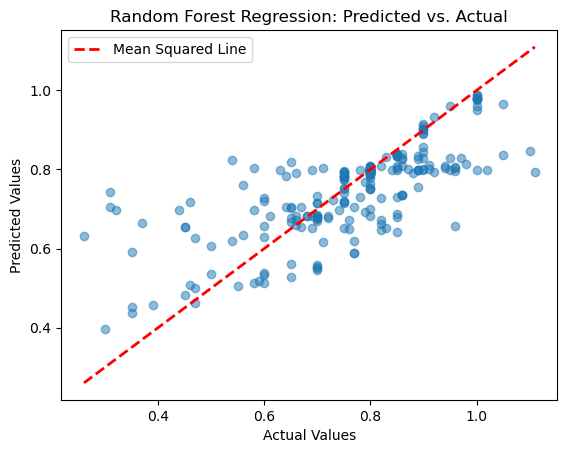

In [58]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Create a scatter plot of predicted vs. actual values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Mean Squared Line')
plt.title('Random Forest Regression: Predicted vs. Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

## 6.2 Out-of-sample prediction

In [59]:
# Separate features (X) and target (y)
X = df_unseen[selected_features]
y = df_unseen['actual_productivity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
y_pred = rf.predict(X_train)
# Make predictions
y_pred = rf.predict(X_test)
# Calculate R-squared and MSE
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)


print(f'R-squared (R2): {r2:.4f}')
print(f'Mean Squared Error (MSE): {mse:.4f}')

R-squared (R2): 0.6191
Mean Squared Error (MSE): 0.0016


The R-squared (R2) value of 0.6191 indicates that our model explains about 61% of the variance in the target variable. In regression analysis, a higher R2 value is desirable, as it indicates that a larger proportion of the variability in the dependent variable has been captured by the model.

The Mean Squared Error (MSE) value of 0.0016. Lower MSE values are preferable, as they indicate that the model's predictions are closer to the actual values.